# Visualización de datos

Semana Tec

Profesores: José Ignacio Treviño / Luz Eunice Angeles

## Librerías de visualización de datos

* **Matplotlib** es la librería más utilizada para crear gráficos en Python. 

  * Está basada en la graficación de Matlab.
  * Permite agregar elementos sobre el gráfico, modificar títulos y leyendas, cambiar colores, entre muchas otras funciones.
  * Como desventaja, para cada detalle que queramos agregar es probable que requiramos agregar una línea de código. 

* **Seaborn** es una librería que está basada en Matplotlib.
  * Tiene la ventaja de que los gráficos son más bonitos por defecto y que utiliza menos líneas de código.
  * Como desventaja, para detalles muy específicos requiere que agreguemos código de matplotlib.

* **Plotly** es una librería para crear gráficos tipo dashboard. 
  * Las visualizaciones creadas con esta librería son interactivas.
  * Como principal desventaja, el código para generar este tipo de gráficos es más complejo que los casos anteriores. 

## Matplotlib

* La utilizamos cuando trabajamos con datos simples.
* Nos sirve para configurar cada elemento del gráfico:
  * Tamaño de la imagen.
  * Tipo de gráfico.
  * Colores y marcas
  * Leyendas y nombres de los ejes.
  * Título.
  * Cuadrícula, ejes primarios y secundarios.
* Para utilizarla, necesitamos imporatarla:
```python
import matplotlib.pyplot as plt
```
* Normalmente usamos el siguiente formato:
```python
# Para configurar el tamaño de la imagen
fig = plt.figure(figsize=(<width, height>)) 
# Con la siguiente instruccion dibujamos un gráfico de línea
plt.plot(<x>, <y>, color = <"color">, label = <"etiqueta">)
# Las siguientes líneas son para agregar elementos del gráfico.
plt.title(<"título">) # Para agregar el título
plt.xlabel(<"título del eje x">) # Etiqueta del eje X
plt.ylabel(<"título del eje y">) # Etiqueta del eje Y
plt.legend(loc='best') # Para mostrar las etiquetas de datos.
plt.grid(<Booleano>) # Para agregar cuadrícula
```


* Vamos a graficar la función $y_1 = 0.5\cdot x$



In [ ]:
# Primero hay que crear los datos
import numpy as np

x = np.linspace(0,5,num=50)
y1 = 0.5*x

# Importamos matplotlib para graficar
import matplotlib.pyplot as plt
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la gráfica
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y=0.5x')
# Cuando tenemos una sola línea, legend no hace mucho sentido.
plt.legend(loc='best')

* Podemos agregar más de una línea en un mismo gráfico.

* Vamos a graficar la función $y_2 = \sin(x)$ sobre el mismo gráfico anterior.


In [ ]:
# Hay que crear el vector de la segunda función
y2 = np.sin(x)

# Usamos el mismo código del gráfico anterior, pero agregamos un segundo plot
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la 1ra gráfica. En color, la 'b' significa blue.
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos la 2da gráfica. Aquí cambiamos el color a rojo.
plt.plot(x, y2, color='r', label='y=sin(x)')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* `plot` grafica *líneas continuas*.
* Si queremos graficar *puntos*, usamos la función `scatter`.
* Podemos mezclar los tipos de gráfico en una misma imagen.

In [ ]:
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Agregamos la 2da gráfica primero. El orden no importa.
plt.plot(x, y2, color='r', label='y=sin(x)')
# Agregamos la 1ra gráfica. Cambiamos a un scatter
plt.scatter(x, y1, color='b', label='y=0.5x')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* Cuando trabajamos con datos *tabulares*, en matplotlib tenemos que configurar cada elemento del gráfico y puede resultar en muchas líneas de código.

* Seaborn nos ayuda mucho cuando queremos graficar DataFrames de manera rápida y en menos líneas de código.

## Seaborn
* Para graficar con Seaborn, la tabla debe tener **formato largo**.
* Cada columna debe representar una variable y cada renglón una observación.
* Cuando en las columnas tenemos valores de una variable (por ejemplo, distintos años), la tabla no tiene formato largo.
* La forma general de graficar con Seaborn es:
```python
# Importamos la librería
import seaborn as sns
# Seaborn hace más bonitas las gráficas.
# Usamos set para definir el estilo de Seaborn para todas las gráficas.
sns.set()
# La gráfica en sí:
sns.<tipo_de_grafico>(data = <df>, x=<"columna X">, 
                    y = <"columna y"> , hue = <"columna color">, 
                    size = <"columna tamaño">, style = <'columna estilo'>, 
                    palette = <'paleta de colores'>, cmap,...)
```

* Vamos a cargar el dataset *Iris* y hacer algunas gráficas.

In [ ]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
# %cd '/gdrive/MyDrive/SemanaTec/arte-analitica'
%cd '/gdrive/MyDrive/Arte Analítica/arte-analitica-main'

In [ ]:
# Cargamos el dataset
import pandas as pd
import numpy as np

books = pd.read_csv('data/bestsellers with categories.csv')
books.head()

In [ ]:
# Obtenemos las estadísticas de los datos
books.describe()

# Amazon bestsellers

El dataset `bestsellers with categories` es una tabla que contiene el top 50 de los libros más vendidos por Amazon en cada año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* Name: nombre del libro
* Author: autor
* User Rating: calificación promedio que los usuarios asignaron al libro (1-5).
* Reviews: número de reseñas
* Price: precio del libro
* Year: año de publicación
* Genre: género literario (ficción/no ficción)


Los datos están en el archivo `bestsellers with
categories.csv` dentro de la carpeta `data`.

In [ ]:
# Importamos seaborn
import seaborn as sns
sns.set()

### Histogramas.

* Los histogramas nos ayudan a visualizar la distribución de **una sola variable numérica**. 

* El eje $x$ está dividido en *secciones* o *cajas*. Este parámetro se llama *bins* en la función de Seaborn.

* El eje $y$ muestra cuántos datos cayeron en cada *caja* en las que se dividió la variable que estamos graficando.

* Los parámetros que necesitamos para crear un histograma son dos:
  * `data`: es la tabla que contiene los datos que vamos a graficar.
  * `x`: es la **variable (columna) numérica** a graficar.

In [ ]:
# Graficamos un histograma con histplot. 
# Sólo hay que definir el DF donde tomamos los datos y cuáles columnas queremos graficar.
sns.histplot(data=books, x='Price')

* Hay parámetros adicionales que podemos modificar o agregar para cambiar la gráfica.
  * `bins`: es el número de cajas (barras) que va a tener el histograma. Por defecto son 10.
  * `kde`: es un parámetro para graficar una aproximación continua del histograma.
  
  * `hue`: controla el color dependiendo de **una variable cualitativa**. Va a generar varios histogramas dependiendo de cuántas categorías tenga la variable.



In [ ]:
sns.histplot(data=books, x='Price', bins=15, kde=True, hue='Genre')

* Por defecto, Seaborn usa el nombre de las columnas para definir las etiquetas de los ejes. 
* Podemos usar las funciones de matplotlib para modificar los elementos del gráfico y el tamaño.

In [ ]:
# Cuando agregamos hue, separamos la variable en grupos dependiendo el valor de la variable cualitativa.
# A medida que agremamos parámetros, vamos controlando el gráfico.

# Tamaño de la imagen
fig = plt.figure(figsize=(9,6))

# Gráfico
sns.histplot(data=books, x='Price', bins=15, kde=True, hue='Genre')

# Ejes y título
plt.xlabel('Precio del libro')
plt.ylabel('Frecuencia')
plt.title('Comparación de la distribución precio por género')

### Gráficos de caja (Boxplot)

* Un diagrama de caja (y bigotes) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. 

* Este gráfico es muy útil porque nos permite visualizar de manera rápida estos estadísticos:
  * 1er cuartil
  * 3er cuartil
  * Mediana
  * Máximo y mínimo
  * Valores atípicos.

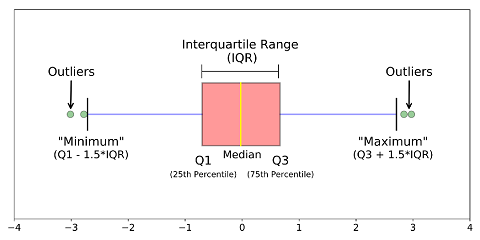

* Cuando graficamos **una sola variable numérica**, el boxplot es parecido a un histograma. Ayuda a ver la distribución de la variable (medida central y de dispersión).

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(7,3))
# Gráfico boxplot
sns.boxplot(data=books, x='Reviews')
# Ejes y título
plt.title('Histograma del número de reseñas')

* Los puntos en el histograma representan **datos atípicos** (outliers). 
* Estos datos presentan valores extremos, es decir, que están muy por encima comparados con el resto de las observaciones.


* El boxplot puede graficar **una variable numérica** separada por **una variable cualitativa**

* A diferencia del histograma, no se empalman la gráficas.

* Ahora, veamos cómo se distribuye la evaluación de los usuarios por género.

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(7,5))
# Gráfico boxplot
sns.boxplot(data=books, x='User Rating', y = 'Genre')
# Ejes y título
plt.title('Histograma de la evaluación de los usuarios por género')

* La ventaja de los diagramas de caja es que podemos invertir los ejes dependiendo de cómo se presenten mejor los datos.

* Si la variable categorica que usamos para separar los datos **tiene muchos niveles**, lo recomendable es usarla en el eje *y*.

In [ ]:
# Tamaño de la imagen
fig = plt.figure(figsize=(8,5))
# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=books, y='User Rating', x = 'Genre')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma de la evaluación de los usuarios por género')
plt.xlabel('Género')
plt.ylabel('Evaluación de los usuarios')

### Mapa de calor (Heatmap)

* Esta técnica de visualización de datos nos muestra la magnitud de una variable que se distribuye en **dos dimensiones**. 
* En esencia, es colorear una **tabla** donde la *intensidad* del color corresponde al *valor* de cada celda. 

* Es muy útil cuando tenemos tablas en formato ancho, donde tenemos valores de variables en las columnas y en las filas. 

* Normalmente, lo utilizamos para visualizar una **matriz de correlación**.

In [ ]:
# Vamos a graficar la matriz de correlación del dataset
books_corr = books.corr()

# Para graficar el mapa de calor usamos heatmap. No necesitamos especificar x ni y
sns.heatmap(data=books_corr)

* La barra lateral es el **mapa de color**, que nos muestra la correspondencia del valor de la tabla a un color en específico. 

* Existen diferentes mapas de colores que podemos utilizar, la lista está en la siguiente liga:

  * [Mapas de Color. Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* Debemos escoger el mapa de color y la escala correcta dependiendo de los datos.

* Sabemos que la correlación va de -1 a 1. Esta es nuestra escala.

* Nos interesa saber si la correlacióne es positiva o negativa, nos conviene un mapa **divergente**.

In [ ]:
# Gráfico heatmap. Seleccionamos los valores extremos con vmin y vmax.
# El mapa de color que usaremos es de un extremo azul y del otro rojo.
# Con annot podemos desplegar el valor de cada celda
# Con square hacemos que el gráfico sea simétrico en tamaño de ejes
sns.heatmap(data=books_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

### Gráficos de barra

* Esta visualización la usamos cuando queremos graficar los valores de una **variable categórica**. 

* Es el equivalente al *conteo* de las apariciones de cada clase de la variable categórica.

* Con Seaborn, python hace el conteo automáticamente.

In [ ]:
# Vamos a graficar el conteo de la variable categórica (Species)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada género.
sns.countplot(data=books, x = 'Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

* Al igual que el boxplot, podemos invertir los ejes si nos conviene. 

* Si hay muchas categorías, lo mejor es tenerlas en el eje Y.

In [ ]:
# Vamos a graficar el conteo de la variable categórica (Genre)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada género.
sns.countplot(data=books, y = 'Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada género')
plt.xlabel('Frecuencia')
plt.ylabel('Género')

* Otra forma de usar los gráficos de barra es para graficar los resultados de hacer **una agrupación** de datos por una variable **cualitativa**.

* Para estos casos, el gráfico se llama **barplot** en vez de *countplot*.

* Por ejemplo, el precio promedio de un libro por género.

In [ ]:
# Vamos a graficar el precio promedio por género
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada género.
# Como queremos el promedio, el estimador es np.mean
# Otras opciones son np.sum, np.max, np.min, np.std

sns.barplot(data=books, x = 'Genre', y='Price', estimator=np.mean)

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada género')
plt.xlabel('Precio promedio')
plt.ylabel('Género')

### Gráfico de dispersión (scatterplot).
* Los usamos cuando queremos ver la relación entre **dos variables numéricas**.

* Podemos usar variables categóricas para modificar el estilo o el color de cada punto.

* Es más rápido usar esta función que con matplotlib.



In [ ]:
# Vamos a graficar la relación entre el ancho y la longitud del sépalo.

# Tamaño de la imagen
fig = plt.figure(figsize=(9,6))

# Gráfico scatterplot. 
sns.scatterplot(data=books, x = 'Reviews', y='User Rating', hue='Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el número de reseñas y la evaluación por género')
plt.xlabel('# de reseñas')
plt.ylabel('Evaluación de los usuarios')

* Si queremos visualizar la relación uno a uno entre todas las variables numéricas, podemos usar la función *pairplot*.

* La estructura es similar a la matriz de correlación.

## Dos o más gráficos en una misma image

* Hay ocasiones en las que nos interesa comparar dos o más gráficos.

* Para eso, podemos usar el comando de `subplots`.

* Esta función requiere que le digamos el tamaño de la cuadrícula que vamos a rellenar con nuestros gráficos.

```python
fig, axs = plt.subplots(<nfilas>, <ncols>, figsize=(<ancho>,<altura>))

# Para graficar en una celda específica, hay que indicárselo a seaborn
sns.histplot(data, x, ..., ax=axs[<fila>, <col>])
sns.boxplot(data, x, ..., ax=axs[0, 1])
...
# Esta línea es para que se espaceen mejor los gráficos
plt.tight_layout()

```

* Si creamos una cuadrícula con **1 sola fila** (o 1 sola columna), no es necesario especificar dos números.

In [ ]:
# Genera, en una misma imagen, un gráfico que muestre el 
# precio promedio de un libro por año,
# y en otro gráfico uno que muestre el total de reseñas hechas
# en cada año.

fig, axs= plt.subplots(1,2, figsize=(12, 5))
sns.barplot(data=books, x='Year', y='Price', estimator=np.mean, ax=axs[0])
sns.barplot(data=books, x='Year', y='Reviews', estimator=np.sum, ax=axs[1])
plt.tight_layout()